<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Custom_TensorFlow_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Custom TensorFlow Components**</center>

--> Use of **Functional API** instead of **Sequential API**

# **Building Custom Loss Function**

### **Building a Custom Loss Function with the Functional API:**

**Write a Custom Loss Function using Function API, that raises the difference b/w the predicions and actual values to the power of 4 i.e, Loss = (pred - actuals)^4**

In [1]:
# import libraries
import tensorflow as tf

In [2]:
# define a function to compute the loss
def custom_loss(y_true, y_pred):

  # compute loss values to the power of 4
  custom_loss = tf.math.pow(y_true - y_pred, 4)

  # return the loss value
  return custom_loss

Now, use it to compile the model:<br>

**--> model.compile(optimizer=optimizer, loss=custom_loss)**

### **Building a Custom Loss Function with the Subclassing API:**

**Write a Custom Loss Function using Subclassing API that raises the difference b/w the predicions and actual values to the power of 4 i.e, Loss = (pred - actuals)^4**

In [3]:
# import libraries
import tensorflow as tf
from tensorflow import keras

In [6]:
# define the class that inherits from the keras Loss class
class myCustomLoss(keras.losses.Loss):

  # define constructor with threshold value =  1.0 and additional keywords
  def __init__(self, threshold=1.0, **kwargs):

    # pass additional keywords to the parent constructor
    super().__init__(**kwargs)

# use Call method to specify logic of the function to find loss
def call(self, y_true, y_pred):

  return tf.math.pow(y_true - y_pred, 4)

### **Building a Custom Loss Function to train a CNN Model to distinguish images of apples and tomatoes:**

Download the dataset to the colab folder:

In [7]:
!wget "https://github.com/PacktWorkshops/The-TensorFlow-Workshop/blob/master/Chapter10/Datasets/apple-or-tomato.zip" -O "/content/apple-or-tomato.zip"

--2023-03-31 04:34:40--  https://github.com/PacktWorkshops/The-TensorFlow-Workshop/blob/master/Chapter10/Datasets/apple-or-tomato.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/apple-or-tomato.zip’

/content/apple-or-t     [ <=>                ] 137.07K  --.-KB/s    in 0.01s   

2023-03-31 04:34:40 (11.9 MB/s) - ‘/content/apple-or-tomato.zip’ saved [140355]



In [4]:
# or, provide the option to upload the files from pc
from google.colab import files
uploaded = files.upload()

Saving apple-or-tomato.zip to apple-or-tomato.zip


In [5]:
# unzip the dataset in the current folder
!unzip \*.zip

Archive:  apple-or-tomato.zip
   creating: apple-or-tomato/test_set/
   creating: apple-or-tomato/test_set/apple/
  inflating: apple-or-tomato/test_set/apple/apple (1).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (10).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (100).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (101).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (102).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (103).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (104).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (105).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (106).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (107).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (108).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (109).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (11).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (110).jpg  
  inflating: apple-or-

In [6]:
# create a variable that contains the path to the dataset
directory = "/content/apple-or-tomato"

In [7]:
import pathlib

# create  the full path to dataset
path = pathlib.Path(directory)

Create a full path for training and validation data folders:

In [8]:
train_dir = path / "training_set"
validation_dir = path / "test_set"

In [9]:
# create a full paths to the apple and tomato folders for the train and vaidation sets
train_apple_dir = train_dir / "apple"
train_tomato_dir = train_dir / "tomato"

validation_apple_dir = validation_dir / "apple"
validation_tomato_dir = validation_dir / "tomato"

Get the total number of images for training and validation sets:

In [10]:
import os

# get the total number of training images
total_train = len(os.listdir(train_apple_dir)) + len(os.listdir(train_tomato_dir))

# get the total number of testing images
total_val = len(os.listdir(validation_apple_dir)) + len(os.listdir(validation_tomato_dir))

Create the **Image Data Generator** that will rescale the images by dividing by 255:

In [11]:
# import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#  initialize the ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# define batch_size, img_height and img_width
batch_size = 32
img_height, img_width = 224, 224

In [13]:
# Create the Image Data Generator
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = validation_dir,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

Found 1300 images belonging to 2 classes.
Found 648 images belonging to 2 classes.


Using **for loop** to display 5 images from train_data_generator:

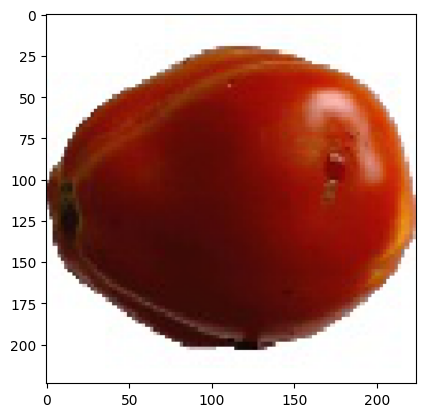

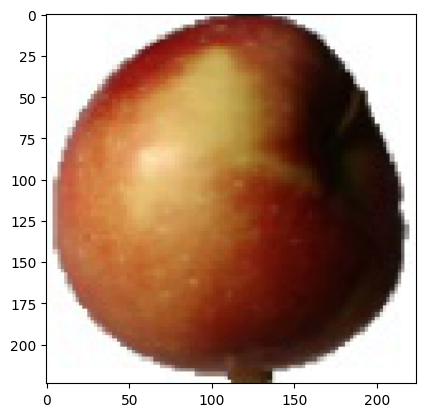

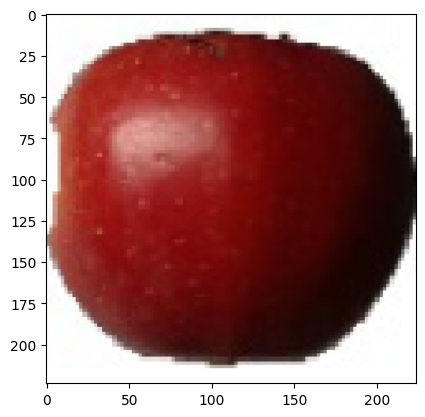

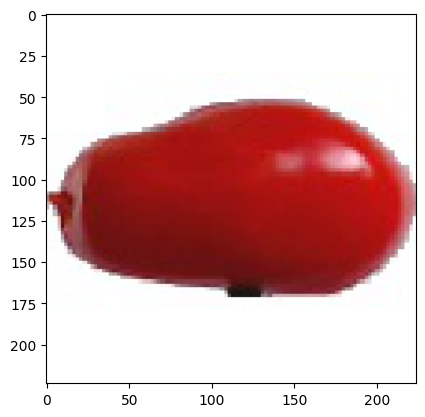

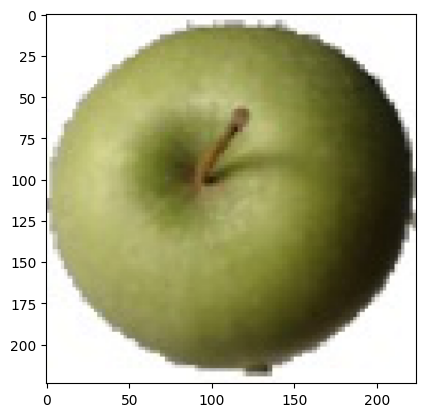

In [14]:
import matplotlib.pyplot as plt

for _ in range(5):

  # get the next batch of training data and labels
  img, label = train_data_gen.next()

  plt.imshow(img[0])
  plt.show()

**Create a Custom Loss Function** that will square the calculated error:

In [15]:
import tensorflow as tf

# define a loss function to mse
def custom_loss_function(y_true, y_pred):

  # predicted values
  print("y_pred:", y_pred)
  # actual values
  print("y_true:", y_true)

  # find the squared-difference
  squared_diff = tf.square(float(y_true) - float(y_pred))

  # return the mean of squred-differences along the last axis
  return tf.reduce_mean(squared_diff, axis=-1)

**Build the CNN Model Architecture by importing Pre-trained model:**

In [16]:
from tensorflow.keras.applications import NASNetMobile

# initialize the model with "imageNet" weights, remove the top layer
# specify the right input dimensions
base_model = NASNetMobile(
    include_top = False,
    input_shape = (100, 100, 3),
    weights = "imagenet"
)

# freeze all the layers of the model so that weights will not be updated during training
base_model.trainable = False

19993432/19993432 [==============================] - 0s 0us/step


In [17]:
from tensorflow.keras.layers import Dense, Flatten

# create a new model that combines the base_model with 2 new top layers 
# add ReLu and sigmoid activation functions
model = tf.keras.Sequential([
    # add the pre-trained model as first layer
    base_model,

    # flatten the output of the base model
    Flatten(),

    # add a Dense layer with 500 units and ReLu activation
    Dense(500, activation="relu"),

    # add final Dense output layer with sigmoid activation
    Dense(1, activation="sigmoid")
])

In [18]:
# display the CNN model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 4, 4, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 16896)             0         
                                                                 
 dense (Dense)               (None, 500)               8448500   
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 12,718,717
Trainable params: 8,449,001
Non-trainable params: 4,269,716
_________________________________________________________________


Compile the model with your **Custom Loss function**, Adam otimizer & accuracy metrics.

In [19]:
model.compile(
    optimizer = "adam",
    loss = custom_loss_function,
    metrics = ["accuracy"]
)

Fit the model with training and validation data generator:

In [23]:

# fit the model to the training data
history = model.fit(
    # specify the traing data generator
    train_data_gen,
    # set the number of steps per epoch
    steps_per_epoch = total_train // batch_size,

    # set the number of epochs to train the model for
    epochs = 5,

    # specify the validation data generator
    validation_data = val_data_gen,
    # set the number of validation steps
    validation_steps = total_val // batch_size
)

------

------

# **Building Custom Layers in the model**

--> For **ResNet** Pre-trained Model

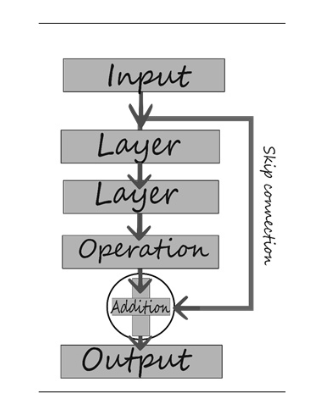

## **Building Custom Layers with the Functional API**